In [1]:
## resource: https://www.kaggle.com/cast42/exploring-features

## import library
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
## warnings from seaborn, data visualization package.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

%matplotlib inline

In [2]:
## load the dataset
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [3]:
## You are provided with an anonymized dataset containing a large number of numeric variables. 
## The "TARGET" column is the variable to predict. 
## It equals one for unsatisfied customers and 0 for satisfied customers.
display(train.head(5))

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
display(train.describe())

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
## Target 0: Happy customers, Target 1: Unhappy customers
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100 * df['TARGET']/train.shape[0]
print(df)

   TARGET  Percentage
0   73012   96.043147
1    3008    3.956853


In [7]:
## find the patterns of the data
print(train.var3.value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [8]:
## since vars represents the nationality
## -999999 means there is no content.
## We can replace it by, here, the most common value: 2
train = train.replace(-999999,2)
print(train.var3.value_counts()[:10])

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: var3, dtype: int64


In [11]:
## add the column with information giving the number of 0 in such row
##   ...........       n0 
##   0  0  1  3   -->   2
##   1  4  5  0   -->   1

## feature: X, label: y
X = train.iloc[:,:-1]
y = train.TARGET

X['n0'] = (X == 0).sum(axis=1)
train['n0'] = X['n0']


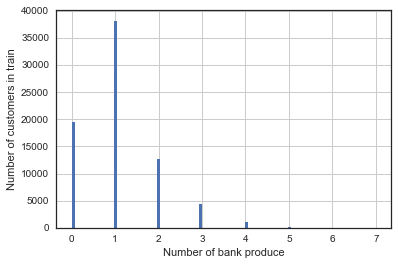

In [12]:
## Based on @dmi3kno https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223
## num_var4 is the number of products

train.num_var4.hist(bins=100)
plt.xlabel('Number of bank produce')
plt.ylabel('Number of customers in train')
#plt.title('Most customers have 1 product with the bank')
plt.show()

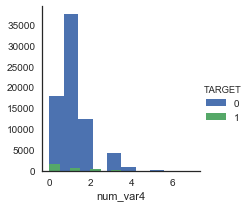

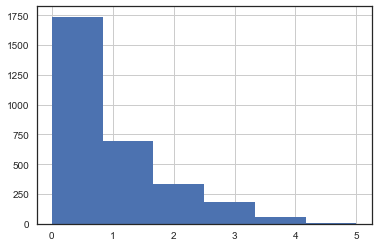

In [18]:
sns.FacetGrid(train, hue="TARGET").map(plt.hist, "num_var4").add_legend()
plt.show()

train[train.TARGET==1].num_var4.hist(bins=6)


In [21]:
## The importance of the feature 
## by XGBOOST
## https://www.kaggle.com/cast42/xgboost-with-early-stopping/code
## and here https://www.kaggle.com/tks0123456789/data-exploration/notebook
print(train.var38.describe())

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64


In [23]:
## try to link the var38 with customer satisfactory
train.loc[train["TARGET"]==1, 'var38'].describe()


count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

In [29]:
#train.var38.value_counts()
train.var38.value_counts().nlargest(10)


117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
329603.970000        7
104644.410000        7
67088.310000         7
125722.440000        7
Name: var38, dtype: int64

In [33]:
## exclude the largest value 117310.979016
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts()
print(train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts().nlargest(5))

451931.22    16
463625.16    12
288997.44    11
104563.80    11
236690.34     8
Name: var38, dtype: int64


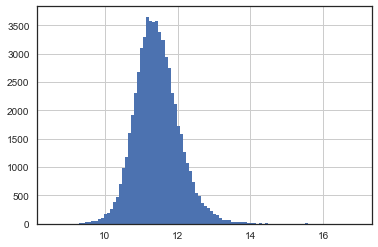

In [34]:
## print distribution in log
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);

In [37]:
## new feature splitting var38 into two group

train['var38mc'] = np.isclose(train.var38, 117310.979016)
train.var38mc.value_counts()

False    61151
True     14869
Name: var38mc, dtype: int64

In [42]:
train['logvar38'] = train.loc[-train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

In [43]:
print("Number of nan in var38mc", train['var38mc'].isnull().sum())
print("Number of nan in logvar38", train['logvar38'].isnull().sum())

Number of nan in var38mc 0
Number of nan in logvar38 0


In [44]:
## some discussion of var15
## https://www.kaggle.com/c/santander-customer-satisfaction/discussion/19291#110414
train.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

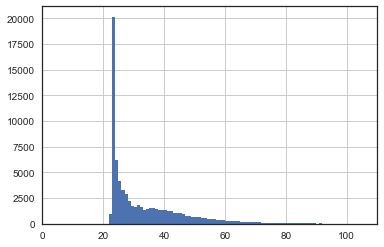

In [46]:
train.var15.hist(bins=100)

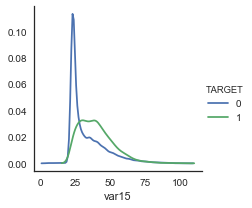

In [47]:
sns.FacetGrid(train, hue='TARGET').map(sns.kdeplot, "var15").add_legend()


count    7.602000e+04
mean     1.367967e+04
std      6.301408e+04
min     -4.942260e+03
25%      0.000000e+00
50%      3.000000e+00
75%      2.359950e+02
max      3.458077e+06
Name: saldo_var30, dtype: float64
Axes(0.125,0.125;0.775x0.755)


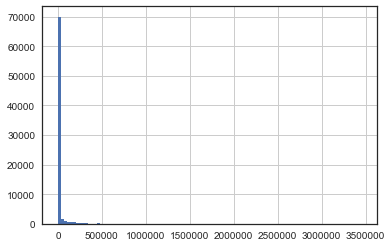

In [49]:
print(train.saldo_var30.describe())
print(train.saldo_var30.hist(bins=100))

In [51]:
train['log_saldo_var30'] = train.saldo_var30.map(np.log)

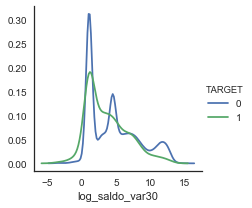

In [52]:
sns.FacetGrid(train, hue="TARGET").map(sns.kdeplot, "log_saldo_var30").add_legend()

### showing interaction using seaborn with FacetGrid ###

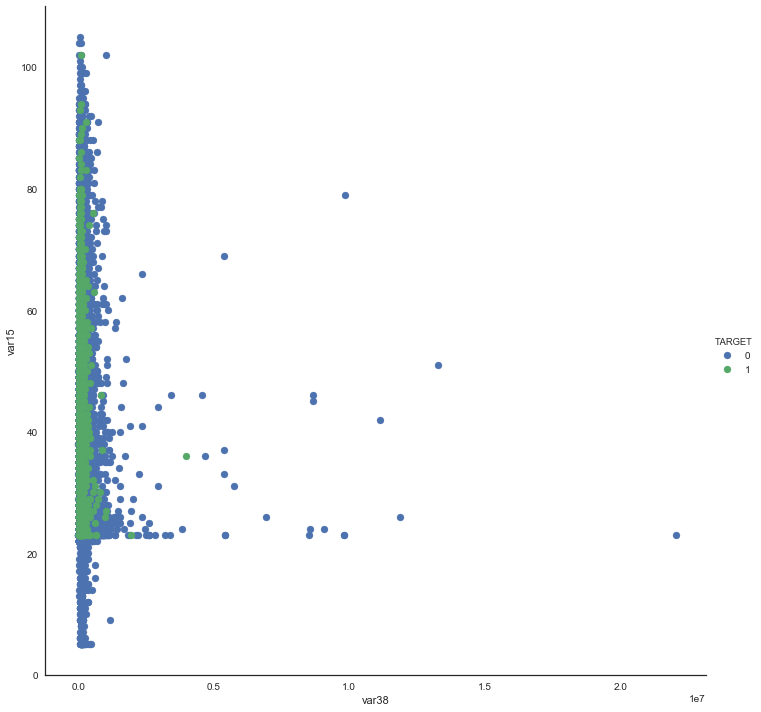

In [53]:
sns.FacetGrid(train, hue="TARGET", size = 10).map(plt.scatter, "var38", "var15").add_legend()

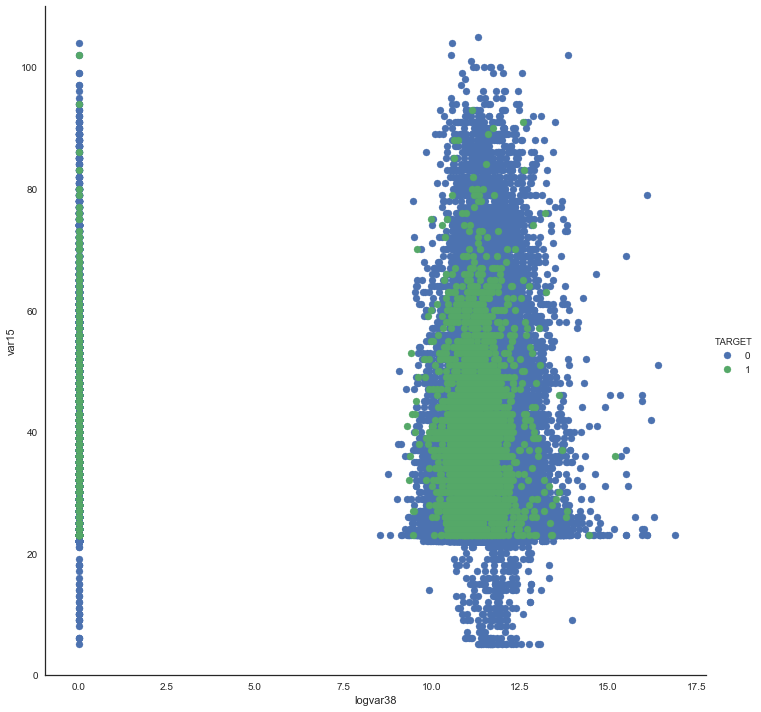

In [55]:
## what if we plot with nature log scale
sns.FacetGrid(train, hue="TARGET", size= 10).map(plt.scatter, "logvar38", "var15").add_legend()

### select the most important feature ###

In [56]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import Binarizer, scale

In [ ]:
## Select features based on chi2 and f_classif

p = 3

X_bin = Binarizer().fit_transform(scale(X))